<a href="https://www.kaggle.com/code/ibrahimawad02/dealing-with-imbalanced-data?scriptVersionId=141288626" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#FFBB55;
           font-size:20px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:black;">
            <b>Dealing with imbalanced data</b>
        </p>
</div>
<div class="alert alert-block alert-info" style="font-size:22px; font-family:arial;">
    Presented by Ibrahim Hossam
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv', sep = ',', encoding = 'utf-8')
df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
65954,No,21.95,No,No,No,0.0,0.0,No,Male,35-39,Asian,"No, borderline diabetes",Yes,Very good,7.0,No,No,No
191713,No,31.66,Yes,No,No,0.0,0.0,No,Male,55-59,White,No,Yes,Good,10.0,No,No,No
120790,No,23.63,Yes,No,No,0.0,25.0,No,Male,45-49,Black,No,Yes,Fair,7.0,Yes,No,No
102838,No,37.79,No,No,No,0.0,0.0,No,Female,40-44,Black,No,No,Fair,5.0,No,No,No
52818,No,24.81,Yes,No,No,10.0,5.0,Yes,Male,70-74,White,No,Yes,Good,5.0,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

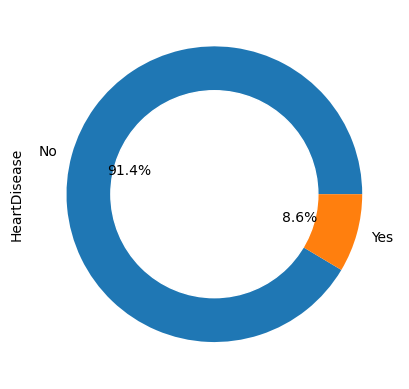

In [5]:
round(df['HeartDisease'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = "%1.1f%%", subplots = True)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

<div class="alert alert-block alert-info" style="font-size:18px; font-family:arial;">
-     We can notice that 91.4% don't have heart disease and this will bias a model if not dealt with because it is very large dataset and the majority is 91% percent
    
</div>

***
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#00FFDD;
           font-size:24px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:black;">
            <b>Preprocessing data</b>
        </p>
</div>

### Label Encoding

In [6]:
# First to see if there is many unique values to decrease them
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

#### No need to decrease labels since the categories are not many

In [7]:
df.columns.tolist()

['HeartDisease',
 'BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [8]:
category_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',  'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease','SkinCancer']
label_encoder = LabelEncoder()

for col in category_columns:
    df[col] = label_encoder.fit_transform(df[col])

# After Encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [9]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


##### Since there is no big difference between numbers we are not obliged to scale the numbers

***
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#F94488;
           font-size:24px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:black;">
            <b>Modelling without dealing with imbalanced data</b>
        </p>
</div>

In [10]:
x = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 30)

## Model 1

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
model1 = DecisionTreeClassifier(max_depth = 3, max_features = 17)

In [14]:
model1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=17)

In [15]:
print(model1.score(x_train, y_train))
model1.score(x_test, y_test)

0.9144409329319647


0.9142953632941

## Model 2

In [16]:
model2 = DecisionTreeClassifier(max_depth = 5, max_features = 15)

In [17]:
model2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=15)

In [18]:
print(model2.score(x_train, y_train))
model2.score(x_test, y_test)

0.9151372130450373


0.9150583496979324

## Model 3

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
model3 = RandomForestClassifier(n_estimators = 35, max_depth = 3, max_features = 15)

In [21]:
model3.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, max_features=15, n_estimators=35)

In [22]:
print(model3.score(x_train, y_train))
model3.score(x_test, y_test)

0.9144409329319647


0.9142953632941

## Model 4

In [23]:
model4 = RandomForestClassifier(n_estimators = 40, max_depth = 4, max_features = 16)

In [24]:
model4.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, max_features=16, n_estimators=40)

In [25]:
print(model4.score(x_train, y_train))
model4.score(x_test, y_test)

0.9149662700232649


0.9147456503520994

## Model 5

I will use logistic regression to find the impact of imbalanced data

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model5 = LogisticRegression(solver = 'saga', C = 0.8, max_iter = 200)

In [28]:
model5.fit(x_train, y_train)

LogisticRegression(C=0.8, max_iter=200, solver='saga')

In [29]:
print(model5.score(x_train, y_train))
model5.score(x_test, y_test)

0.9150496568631539


0.9150208257764325

***
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#F94488;
           font-size:20px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:black;">
            <b>Dealing with imbalanced data</b>
        </p>
</div>

### Method 1: Resampling

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [32]:
model5.fit(x_resampled, y_resampled)

LogisticRegression(C=0.8, max_iter=200, solver='saga')

In [33]:
print(model5.score(x_resampled, y_resampled))
model5.score(x_test, y_test)

0.7372232987575515


0.6983577030356852

### Method 2: Class weighting

In [34]:
class_weights = {0: 1, 1: 10}
c_model = RandomForestClassifier(class_weight=class_weights, random_state=42)

In [35]:
c_model.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42)

In [36]:
print(c_model.score(x_train, y_train))
c_model.score(x_test, y_test)

0.9961558666811204


0.9040263167769453

### varying class weights

In [37]:
class_weights = {0: 1, 1: 4}
c_model2 = RandomForestClassifier(class_weight=class_weights, random_state=42)

In [38]:
c_model2.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 4}, random_state=42)

In [39]:
print(c_model2.score(x_train, y_train))
c_model2.score(x_test, y_test)

0.9969397029760764


0.9046141915471113

### Method 3: Cost-Sensitive learning

In [40]:
cs_model = RandomForestClassifier(class_weight='balanced', random_state=21)

In [41]:
cs_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=21)

In [42]:
print(cs_model.score(x_train, y_train))
cs_model.score(x_test, y_test)

0.9959974316853314


0.9036010456666125

### Method 4: Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
scores_train = cross_val_score(model3, x_train, y_train, cv=5, scoring='accuracy')
scores_test = cross_val_score(model3, x_test, y_test, cv=5, scoring='accuracy')

In [45]:
print(f"train accuracy scores for each fold:{scores_train}")
print(f"test accuracy scores for each fold:{scores_test}")

train accuracy scores for each fold:[0.91442568 0.91444475 0.91444475 0.91444475 0.91444475]
test accuracy scores for each fold:[0.91432145 0.91469669 0.91425891 0.91463415 0.91469135]


***
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#231855;
           font-size:20px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            <b>Thanks For Reading</b>
        </p>
</div>